# INFO 7390
# Advances in Data Science and Architecture

# Bantaba Project on Convolutional Neural Network Using TensorFlow

![title](images/dl1.jpg)

# 1. Abstract
The focus of the project is to understand Convolutional Neural Network(CNN) as a beginner. A very easy way to explain and interpret a CNN is using classification model. In this project, we will be learning how CNN classifies Kannada digits, from 1 through 9

This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on Kannada digits dataset. I have chosen to build it with keras API (Tensorflow backend) which is very intuitive. To ensure the model did not overfit, we used Keras callbacks

# 2. Table of Contents 


1. Abstract


2. Table of Contents


3. Acknowledgement


4. Introduction


5. Running the Notebook


6. Importing packages and collecting data


7. Data Description and preparation


    7.1 Checking the Target Distribution


8. Data pre-processing

    8.1 Image Normalization

    8.2 Reshaping the images

    8.3 Splitting training and Validation Set

    8.4 Label Encoding target variables
    
    8.5 Data Augmentation


9. Building the Neural Network

    9.1 Defining and Outlining the model

    9.2 Complie and Traine the model

    9.3 Visualizing the Accuracy and Loss

    9.4 Prediction
        
        9.4.1 Evaluating Some Wrong Predictions
        
        9.4.2 Evaluating Right Predictions


10. Conclusion


11. Citation


12. Licensing

# 3. Acknowledgment

I acknowledge that the kannada_MNIST dataset was taken from https://www.kaggle.com/c/Kannada-MNIST/overview/description and was created and provided by Vinay Uday Prabhu

https://arxiv.org/abs/1908.01242

https://vinayprabhu.github.io/

# 4. Introduction

![title](images/KannadaNumbers.png)

There are hundreds of thousand languages world wide. Some have scripts, some don't. **Kannada** is one of the oldest languages that originated in **South India** and is still spoken by majority of the people espicially in **Karnataka**. I am a kannadiga and I can speak, read and write kannada. 

The main focus of the project is to write a chapter on CNN that could be read and understood easily; especially for a beginner.
The sole purpose for having chosen this data set is because it is easier to understand the operation of CNNs through MNIST datasets. 

The dataset has 3 parts namely, train,test and Dig-MNIST. Dig-MNIST is a real world handwritten dataset (with 10k images), that can serve as an out-of-domain test dataset.


# 5. Running the Notebook

This file was ran on **Google CoLab** with runtime set to **GPU**. For all who don't what a google colab is, here is a breif inroduction- Google Colab is a free cloud service and now it supports free GPU! You can; improve your Python programming language coding skills. develop deep learning applications using popular libraries such as Keras, TensorFlow, PyTorch, and OpenCV.

1. Open **google colab** Jupyter Notebook
2. **Rename** the file
3. Set the runtime to **GPU** [Runtime>change runtime type>hardware accelerator>GPU]
4. To the right side of the page, there is an option to upload files from the local system. Click on upload button and upload the zip file
5. Run the file

# 6. Importing packages and collecting data

### We will mainly use 4 libraries.

pandas and numpy : It's used to handle our csv files.

matplotlib & seaborn : Used for charting and plotting.

sklearn : Popular ML library.We will use it for splitting our data.

Keras : Popular Deep learning library,we will use it to build our CNN Network.

In [0]:
'''Importing Data Manipulattion Moduls'''
import numpy as np
import pandas as pd

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Importing preprocessing libraries'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from zipfile import ZipFile
file_name = "Kannada-MNIST.zip"

import os
import cv2

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [10]:
import tensorflow as tf 
print(tf.__version__)

from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ModelCheckpoint

2.2.0-rc3


In [11]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
train_kannadaMnist = pd.read_csv("train.csv")
test_kannadaMnist = pd.read_csv("test.csv")
dig_kannadaMnist = pd.read_csv("Dig-MNIST.csv")

# 7. Data Description and Preparation

In [21]:
'''Train and test data at a glance.'''
bold('**Preview of Train Data:**')
display(train_kannadaMnist.head(3))
bold('**Preview of Test Data:**')
display(test_kannadaMnist.head(3))

**Preview of Train Data:**

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Preview of Test Data:**

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
'''Ckecking for null and missing values'''
bold('**Train Data**')
display(train_kannadaMnist.isnull().any(). describe())
bold('**Test Data**')
display(test_kannadaMnist.isnull().any(). describe())

**Train Data**

count       785
unique        1
top       False
freq        785
dtype: object

**Test Data**

count       785
unique        1
top       False
freq        785
dtype: object

In [0]:
'''Seting X and Y'''
y_train = train_kannadaMnist['label']

# Drop 'label' column
X_train = train_kannadaMnist.drop('label', axis = 1)

X_test = test_kannadaMnist.drop('id', axis = 1)

dig_img = dig_kannadaMnist.drop('label', axis = 1)

In [24]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', X_train.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', X_test.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (60000, 784)
Output vector dimension: (60000,)
Test data dimension: (5000, 784)


## 7.1 Checking the Target Distribution

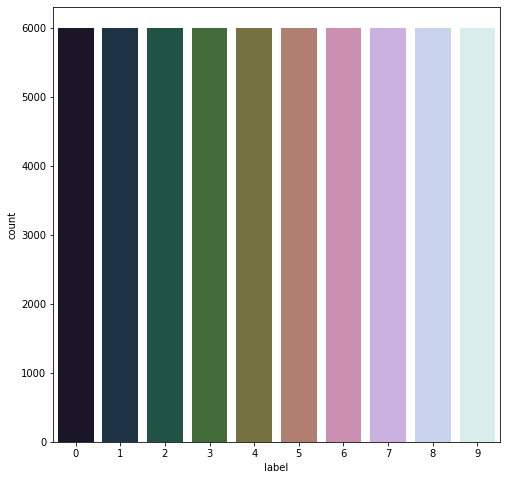

Cool


In [25]:
'''Visualizating the taget distribution'''
plt.figure(figsize = (8,8))
sns.countplot(y_train, palette='cubehelix')
plt.show()
print("Cool")

In [26]:
images = train_kannadaMnist.iloc[:,1:].values
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

image_size = images.shape[1]
print('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print('image_width => {0}\nimage_height => {1}'.format(image_width, image_height))

image_size => 784
image_width => 28
image_height => 28


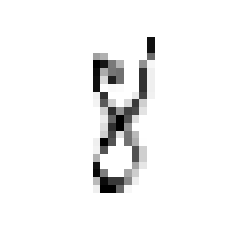

In [29]:
'''Displaying image'''
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap='binary')

# output image     
display(images[4])

In [0]:
'''Converting X_train to numpy array'''
X_train_array = X_train.to_numpy()

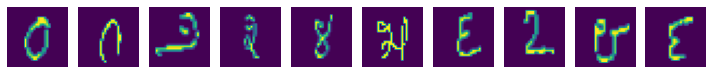

In [31]:
'''Displaying images'''
n=10
fig = plt.figure(figsize=(10,10))

for i in range(n):
    ax = fig.add_subplot(2, n, i+1, xticks=[], yticks=[])
    ax.imshow(X_train_array[i].reshape(image_width,image_height), cmap='viridis')
    ax.axis("off")

plt.tight_layout()
plt.show()

# 8. Data Preprocessing

## 8.1 Image Normalization

Normalize Pixel Values
For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.

This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

In [0]:
'''Normalizing the data'''
X_train = X_train / 255.0
X_test = X_test / 255.0
dig_img = dig_img/255.0

## 8.2 Reshaping the images

Train and test images (28 x 28) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [0]:
'''Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)'''
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
dig_img = dig_img.values.reshape(-1,28,28,1)

In [34]:
print(X_train.shape, X_test.shape, dig_img.shape)

(60000, 28, 28, 1) (5000, 28, 28, 1) (10240, 28, 28, 1)


Data reshape into 60000 examples of height 28 and width 28 and 1 channel.

## 8.3 Splitting Training and Validation set

Now we will split out training data into train and validation data 10 percent of the training data will be used for validation purpose.

In [0]:
'''Set the random seed'''
seed = 44
'''Split the train and the validation set for the fitting'''
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=seed)

## 8.4 Label encoding of Target Variable

In [0]:
'''convert class labels from scalars to one-hot vectors'''
# 0 => [1 0 0 0 0 0 0 0 0 0]
# 1 => [0 1 0 0 0 0 0 0 0 0]
# ...
# 9 => [0 0 0 0 0 0 0 0 0 1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10, dtype='uint8')

y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10, dtype='uint8')

## 8.5 Data Augmentation
To get more training data, to avoid overfitting, data augmentation is used. Data augmentation is the creation of altered copies of each training instance (image) within a training dataset. 

1. Ramdomly rotate the images by 10 degrees
2. Randomly zoom the images by 25%
3. Randomly shift its height and width by 25%

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.


In [0]:
# Artificially increase training set
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)
train_datagen.fit(X_train)

# 9. CNN Model

## 9.1 Defining and Outlining the model

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

![title](images/Cnn1.png)

The first is the ***convolutional (Conv2D) layer***. It is like a set of ***learnable filters***. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.


![title](images/FilterGiphy.gif)

The CNN can extract features that are useful everywhere from these transformed images (feature maps).

***Padding***
we can pad the image with an additional border, i.e., we add one pixel all around the edges. 

***Valid:*** It means no padding. If we are using valid padding, the output will be (n-f+1) X (n-f+1)
***Same:*** Here, we apply padding so that the output size is the same as the input size, i.e.,
n+2p-f+1 = n
So, p = (f-1)/2

![title](images/Padding.png)

The second important layer in CNN is the ***pooling (MaxPool2D) layer***. This layer simply acts as a ***downsampling filter***. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

![title](images/Pooling.png)

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

***Dropout is a regularization method***, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

![title](images/Dropout.png)

***'relu'*** is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.


The ***Flatten layer*** is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

![title](images/Flat.png)

In the end I have used the features in two ***fully-connected (Dense) layers*** which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

![title](images/Full.png)

Fully Connected Layer and Output Layer Fully connected layers or dense layers are the same hidden layers consisting of defined number of neurons connected with elements of another layer that we discussed in simple ANN. However the output layer is also the same but the number of neurons depend on our task. 

In summary, the architecture of CNN , we can simply understand that it consist of an input layer followed by a Conv layer. The dimensions of conv layer depends on the data and problem, hence changing the dimensions accordingly. After the Conv Layer there is a activation layer , usually ReLU since it gives better results. After some conv and relu combination , pooling layer is used to reduce the size. Then after some combination of previously defined architecture, flattening layer is used to flatten the input for fully connected layer. Next to these layer, the last layer is the output layer.

In [0]:
'''Set the CNN model'''
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
#model = tensorflow.keras.Sequential()
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.15))
          
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.40))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.40))
model.add(Dense(10, activation = "softmax"))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)       

# 9.2 Complie and Train

In simpler terms, ***optimizers*** shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction

In [0]:
model.compile(optimizer="adam", loss=['categorical_crossentropy'], metrics=['accuracy'])

A ***callback*** is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.
Keras callbacks can help you fix bugs more quickly, and can help you build better models. They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.

Here we use 2 callback functions:

***Early Stopping*** - One technique to reduce overfitting in neural networks is to use early stopping. Early stopping prevents overtraining of the model by terminating the training process if it’s not really learning anything.

***Learning Rate Reduction*** - The learning rate determines the size of the steps taken during the gradient descent process.
With the ***ReduceLROnPlateau*** function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [0]:
# Set a learning rate annealer. Learning rate will be half after 3 epochs if accuracy is not increased
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

### What is the Difference Between a Batch and an Epoch in a Neural Network?

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

In [0]:
batch_size=75
epochs = 50
#num_classes = 10
#learning_rate = 0.001

In [53]:
filepath = "model.h5"

earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

callbacks_list = [earlystopper, checkpoint]

history = model.fit(X_train, y_train, batch_size = batch_size , epochs = epochs, 
                              validation_data=(X_val, y_val),
                              verbose=1,
                              callbacks=callbacks_list)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 549s 10ms/step - loss: 0.2827 - accuracy: 0.9133 - val_loss: 0.0465 - val_accuracy: 0.9858

Epoch 00001: val_loss improved from inf to 0.04651, saving model to model.h5
Epoch 2/50
54000/54000 [==============================] - 551s 10ms/step - loss: 0.0808 - accuracy: 0.9799 - val_loss: 0.0269 - val_accuracy: 0.9933

Epoch 00002: val_loss improved from 0.04651 to 0.02691, saving model to model.h5
Epoch 3/50
54000/54000 [==============================] - 547s 10ms/step - loss: 0.0535 - accuracy: 0.9872 - val_loss: 0.0217 - val_accuracy: 0.9938

Epoch 00003: val_loss improved from 0.02691 to 0.02167, saving model to model.h5
Epoch 4/50
54000/54000 [==============================] - 551s 10ms/step - loss: 0.0429 - accuracy: 0.9888 - val_loss: 0.0207 - val_accuracy: 0.9942

Epoch 00004: val_loss improved from 0.02167 to 0.02072, saving model to model.h5
Epoch 5/50
54000/54000 [=======

## 9.3 Visulizing Accuracy and Loss

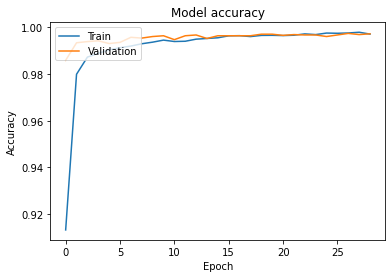

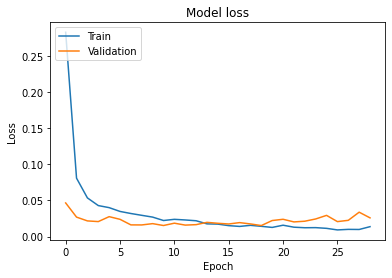

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 

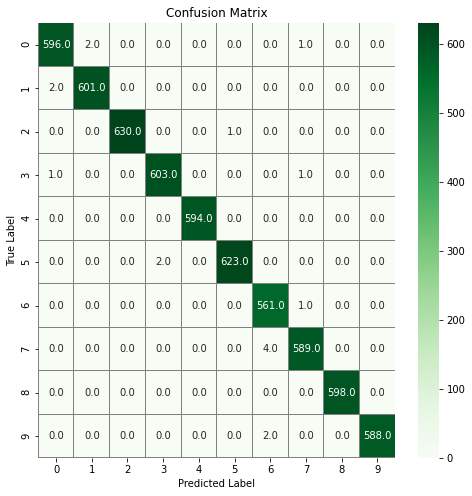

In [56]:
'''confusion matrix'''
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 9.4 Making Predictions

In [0]:
'''predict results'''
pred_dig = model.predict(dig_img)
dig_kannadaMnist['pred'] = np.argmax(pred_dig, axis=1)

#'''select the indix with the maximum probability'''
#results = np.argmax(results,axis = 1)

In [58]:
# look at those that were classified wrongly in X_dig
dig_kannadaMnist['correct'] = dig_kannadaMnist['label'] - dig_kannadaMnist['pred']
errors = dig_kannadaMnist[dig_kannadaMnist['correct'] != 0]
error_list = errors.index
print('Number of errors is ', len(errors))
print('The indices are ', error_list)

Number of errors is  1894
The indices are  Int64Index([   17,    23,    27,    37,    57,    67,    87,    97,   106,
              117,
            ...
            10217, 10218, 10219, 10221, 10224, 10226, 10227, 10228, 10229,
            10234],
           dtype='int64', length=1894)


## 9.4.1 Some of the wrong predictions for dig dataset:

### Further Investigation..
We will go on to see some of the misclassified images.We will simply inspect them to understand if it was a tough one to predict or not.Let's see...

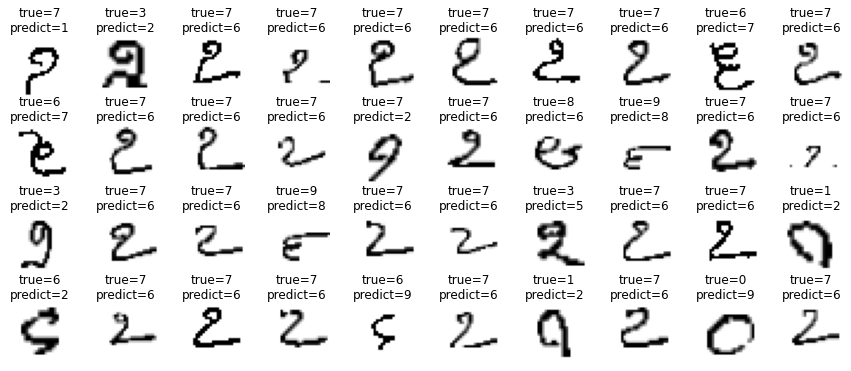

In [59]:
# plot images of some of the wrong predictions for X_dig
plt.figure(figsize=(15,10))
for i in range(40):
    plt.subplot(6, 10, i+1)
    plt.imshow(dig_img[error_list[i]].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("true={}\npredict={}".format(dig_kannadaMnist['label'][error_list[i]], 
                                           dig_kannadaMnist['pred'][error_list[i]]), y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

Looking at those that were predicted wrongly, there are quite several difficult and ambiguous ones.

## 9.4.2 Correct Predictions

**Some examples of predictions made**

In [60]:
# predict on test set
predictions = model.predict(X_test)
print(predictions.shape)

(5000, 10)


In [0]:
# set the predicted labels to be the one with the highest probability
predicted_labels = np.argmax(predictions, axis=1)

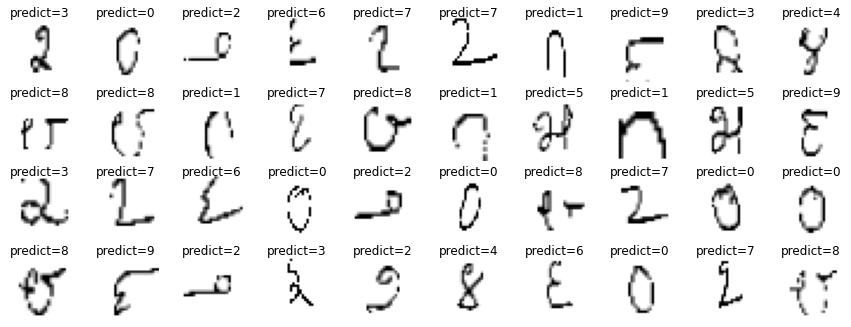

In [65]:
# look at some of the predictions for test_X
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % predicted_labels[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

**My eyeball reading of the prediction is:**

3 0 2 6 7 7 1 9 3 4

8 8 1 7 8 1 5 1 5 9 

3 7 6 0 2 0 8 7 0 0 

8 9 2 3 2 4 6 0 7 8

**Looks reasonable.**

***I am a kannadiga(Native kannada speaker) and I am fluent in reading, writing and speaking in this language***


# 10.Conclusion

The above model works pretty well on the traing, validation and test dataset. The Notebook is designed in such a way that it could be easily understood by a Newbie(beginner). I believe that I have covered and explained all the concepts of Convolutional Neural Network. 

Further, the model can be applied to a whole new image which is not previously seen/learnt by the model

# 11. Author

This notebook was created by ***Indupriya Kompi Sadasivappa***, currently enrolled student at ***Northeastern University, Boston*** as a contribution to ***Bantaba Projects*** in the month of ***April,2020*** under the guidance and supervision of ***Nicholas Brown***, Assistant Teaching Professor,  Multidisciplinary Graduate Engineering Programs at ***Northeastern University, Boston***

kompisadasivappa.i@husky.neu.edu

Bearing **NUID 001051831**

![title](images/tq.gif)


# 11.Citation

1. https://www.kaggle.com/c/Kannada-MNIST
2. https://www.kaggle.com/kaushal2896/kannada-mnist-using-cnn/notebook
3. https://www.kaggle.com/shahules/indian-way-to-learn-cnn
4. https://towardsdatascience.com/
5. Picture are taken from https://www.google.com/imghp?hl=en, a few of the images/giphys are snipped from    https://towardsdatascience.com/


# 12.Licensing
Copyright 2020 Indupriya Kompi Sadasivappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.